# CIFAR10 classification


In [43]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt


from tensorflow.keras import regularizers

from keras.layers import Input, Flatten, Dense, Conv2D, MaxPooling2D
from keras.models import Model
from keras.optimizers import Adam
from keras.utils import to_categorical

from keras.layers import Dropout


from keras.datasets import cifar10
import copy 



In [37]:
#import CIFAR10
NUM_CLASSES = 10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(y_train[5][0])

1


In [76]:

#Change number of classes to 3
#Cat,Dog, others
for i in range (0,len(x_train)):
    if (y_train[i][0]<3 or y_train[i][0]==4 or y_train[i][0]>5):
        y_train[i]=2;
    elif (y_train[i][0]==3):
        y_train[i]=0
    elif (y_train[i][0]==5):
        y_train[i]=2

for i in range (0,len(x_test)):
    if (y_test[i][0]<3 or y_test[i][0]==4 or y_test[i][0]>5):
        y_test[i]=2;
    elif (y_test[i][0]==3):
        y_test[i]=0
    elif (y_test[i][0]==5):
        y_test[i]=2
        
NUM_CLASSES = 3

#change it back to 10 classes
NUM_CLASSES = 10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(y_train[5][0])

actual_single1=y_test;

#=============================
#normalization
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

meanTrainImage=np.zeros(3, dtype=float)
for j in range (0, 3):
    meanTrainImage[j] = np.mean(x_train[:,:,:,j].flatten())


for i in range (0, len(x_train)):
    for j in range (0, 3):
        x_train[i,:,:,j] = copy.copy(x_train[i,:,:,j] - meanTrainImage[j])/255

        
meanTestImage=np.zeros(3, dtype=float)
for j in range (0, 3):
    meanTestImage[j] = np.mean(x_test[:,:,:,j].flatten())


for i in range (0, len(x_test)):
    for j in range (0, 3):
        x_test[i,:,:,j] = copy.copy(x_test[i,:,:,j] - meanTestImage[j])/255
        


print(x_train.shape)    

#categorized the target
y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

1
(50000, 32, 32, 3)


In [46]:


#network structure:
input_layer = Input((32,32,3))

x=input_layer

x = Conv2D(32, (3, 3), padding="same", activation="relu") (x)
x = MaxPooling2D(pool_size=(2, 2),strides=(2, 2), padding='valid')(x)


x = Conv2D(16, (3, 3), padding="same", activation="relu") (x)
x = MaxPooling2D(pool_size=(2, 2),strides=(2, 2), padding='valid')(x)


x = Flatten()(x)

output_layer = Dense(NUM_CLASSES, activation = 'softmax')(x)

model = Model(input_layer, output_layer)




In [47]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 16)        4624      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 8, 8, 16)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                10250     
Total para

In [48]:
#Optimization part for the back propagation
opt = Adam(lr=0.0001) #learning rate (lr)

model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

#model.compile(loss=keras.losses.categorical_crossentropy,
              #optimizer=keras.optimizers.Adadelta(),
              #metrics=['accuracy'])


In [50]:
#Training part
model.fit(x_train[1:10000], y_train[1:10000], validation_split=0.33 
          , batch_size=32
          , epochs=50
          , shuffle=True)



Train on 6699 samples, validate on 3300 samples
Epoch 1/50
6699/6699 [==============================] - 3s 410us/step - loss: 1.8383 - acc: 0.3499 - val_loss: 1.8210 - val_acc: 0.3570
Epoch 2/50
6699/6699 [==============================] - 3s 408us/step - loss: 1.7869 - acc: 0.3738 - val_loss: 1.7929 - val_acc: 0.3667
Epoch 3/50
6699/6699 [==============================] - 3s 405us/step - loss: 1.7440 - acc: 0.3892 - val_loss: 1.7595 - val_acc: 0.3791
Epoch 4/50
6699/6699 [==============================] - 3s 406us/step - loss: 1.7059 - acc: 0.4017 - val_loss: 1.7238 - val_acc: 0.3867
Epoch 5/50
6699/6699 [==============================] - 3s 407us/step - loss: 1.6698 - acc: 0.4116 - val_loss: 1.6984 - val_acc: 0.3973
Epoch 6/50
6699/6699 [==============================] - 3s 411us/step - loss: 1.6336 - acc: 0.4262 - val_loss: 1.6600 - val_acc: 0.4103
Epoch 7/50
6699/6699 [==============================] - 3s 417us/step - loss: 1.6017 - acc: 0.4354 - val_loss: 1.6352 - val_acc: 0.4212


KeyboardInterrupt: 

In [64]:
#Evaluate the model
model.evaluate(x_test, y_test)


CLASSES = np.array(['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck'])

preds = model.predict(x_test)
preds.shape
preds_single = CLASSES[np.argmax(preds, axis = -1)]
actual_single = CLASSES[np.argmax(y_test, axis = -1)]



10000/10000 [==============================] - 1s 95us/step


W0519 12:15:59.813791 26064 image.py:656] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0519 12:15:59.822795 26064 image.py:656] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0519 12:15:59.830744 26064 image.py:656] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0519 12:15:59.838721 26064 image.py:656] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0519 12:15:59.847068 26064 image.py:656] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0519 12:15:59.857039 26064 image.py:656] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0519 12:15:59.865017 26064 image.py:656] Clipping input data to the valid range for ims

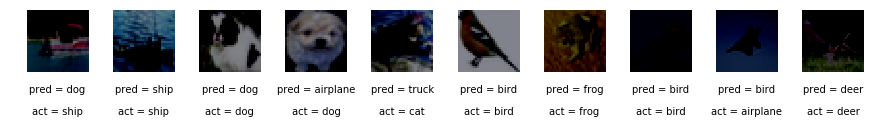

In [89]:

n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 13))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes) 
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)


In [87]:
#accuracy of every classes
class_correct = np.zeros (10)# list(0. for i in range(10))
class_total = np.zeros (10) # list(0. for i in range(10))

for i in range (0,len(x_test)):
    if (actual_single[i]==preds_single[i]):
        class_correct[actual_single1[i]]=class_correct[actual_single1[i]]+1;
    class_total[actual_single1[i]]=class_total[actual_single1[i]]+1;
    
for j in range (0,10):
    print("Accuracy of ",CLASSES[j], ":",class_correct[j]/class_total[j])
    
    

Accuracy of  airplane : 0.423
Accuracy of  automobile : 0.585
Accuracy of  bird : 0.474
Accuracy of  cat : 0.184
Accuracy of  deer : 0.3
Accuracy of  dog : 0.39
Accuracy of  frog : 0.636
Accuracy of  horse : 0.577
Accuracy of  ship : 0.633
Accuracy of  truck : 0.56
